# Постановка задачи

Этот набор данных был получен из Национального института диабета и болезней органов пищеварения и почек. Целью набора данных является диагностическое предсказание наличия или отсутствия диабета у пациента на основе определенных диагностических измерений, включенных в набор данных. На отбор этих экземпляров из более крупной базы данных было наложено несколько ограничений. В частности, все пациенты здесь - женщины в возрасте не менее 21 года из племени индейцев Пима.

# Подключение модулей

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Загрузка данных

In [10]:
diabetes = pd.read_csv("diabetes.csv")

In [11]:
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Описание признаков

Pregnancies - Количество беременностей

Glucose - Концентрация глюкозы в плазме крови через 2 часа при проведении перорального теста на толерантность к глюкозе

BloodPressure - Диастолическое артериальное давление (мм рт. ст.)

SkinThickness - Толщина кожной складки трицепса (мм)

Insulin - 2-часовой сывороточный инсулин (мю Ед/мл)

BMI - Индекс массы тела (вес в кг/(рост в м)^2)

DiabetesPedigreeFunction - Функция составления родословной диабета

Age - Возраст (годы)

Outcome - Переменная класса (0 или 1) 268 из 768 - 1, остальные - 0


# Разведочный анализ данных

In [15]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
diabetes = diabetes.drop_duplicates()

In [20]:
diabetes.shape

(768, 9)

Набор данных состоит из 9 признаков, 8 - числовые, 1 - бинарный. Отсутствие пустых данных. Дублирующих записей нет.

In [22]:
#Статистичесная информация
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


У признаков Glucose, BloodPressure, SkinThickness, Insulin, BMI есть значения равны нулю, что является неправильным.

Pregnancies - значение в норме.

In [30]:
column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for i in column:
    print(diabetes[diabetes[i] == 0][i].value_counts())
    

0    5
Name: Glucose, dtype: int64
0    35
Name: BloodPressure, dtype: int64
0    227
Name: SkinThickness, dtype: int64
0    374
Name: Insulin, dtype: int64
0.0    11
Name: BMI, dtype: int64


In [37]:
column = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
diabetes1 = diabetes.copy(deep=True)
diabetes1[column] = diabetes1[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan)
diabetes1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [39]:
for i in column:
    diabetes1[i].fillna(diabetes1[i].mean(), inplace=True)
    
diabetes1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 60.0 KB


Сосчитали количество нулевых значений у признаков Glucose, BloodPressure, SkinThickness, Insulin, BMI и заменили эти данные соотвестующими средними значениями

In [40]:
diabetes1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

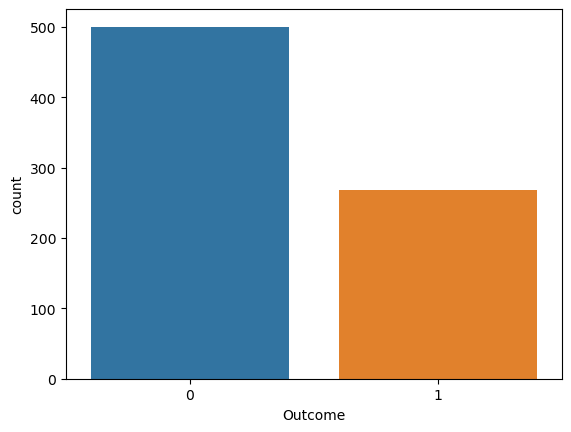

In [41]:
sns.countplot(data=diabetes1, x="Outcome")

In [42]:
diabetes1["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

268 пациентов страдают диабетом, а 500 - нет. Выборка не сбалансированная.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

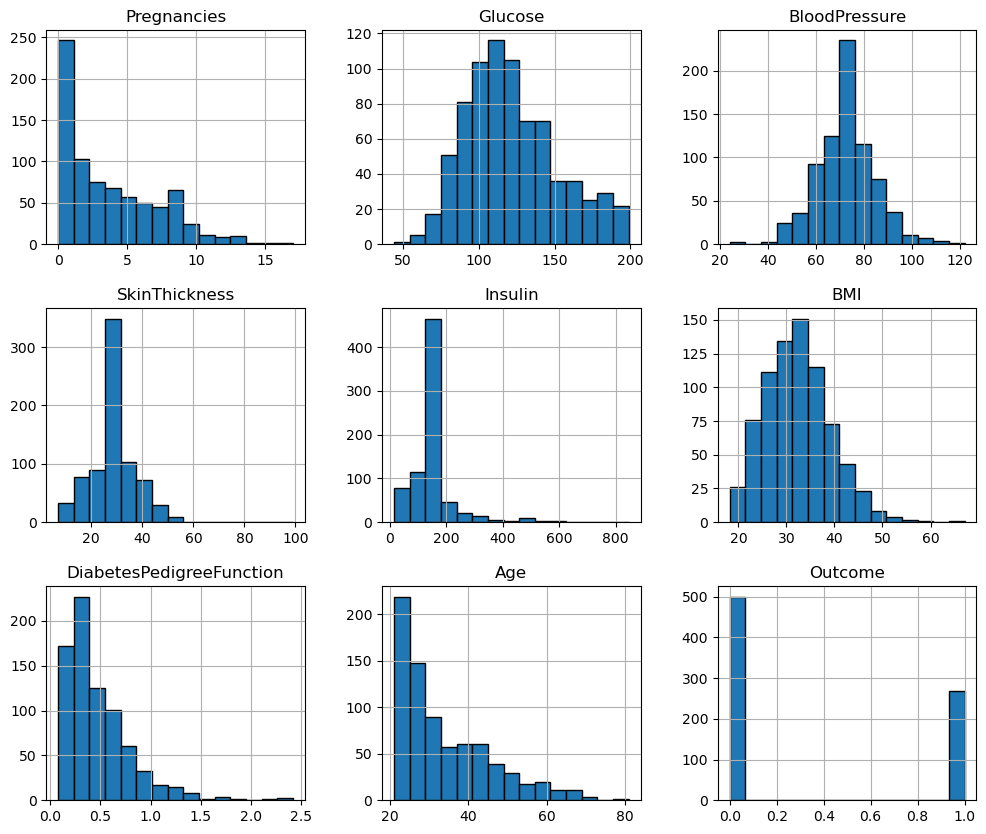

In [49]:
diabetes1.hist(figsize=(12,10), bins=15, edgecolor="black")


Распредлению по признакам близко к нормальному - Glucose, BloodPressure, BMI

Искаженное распределение у признаков - SkinThickness, Insulin является обоснованным

<Figure size 3000x3000 with 0 Axes>

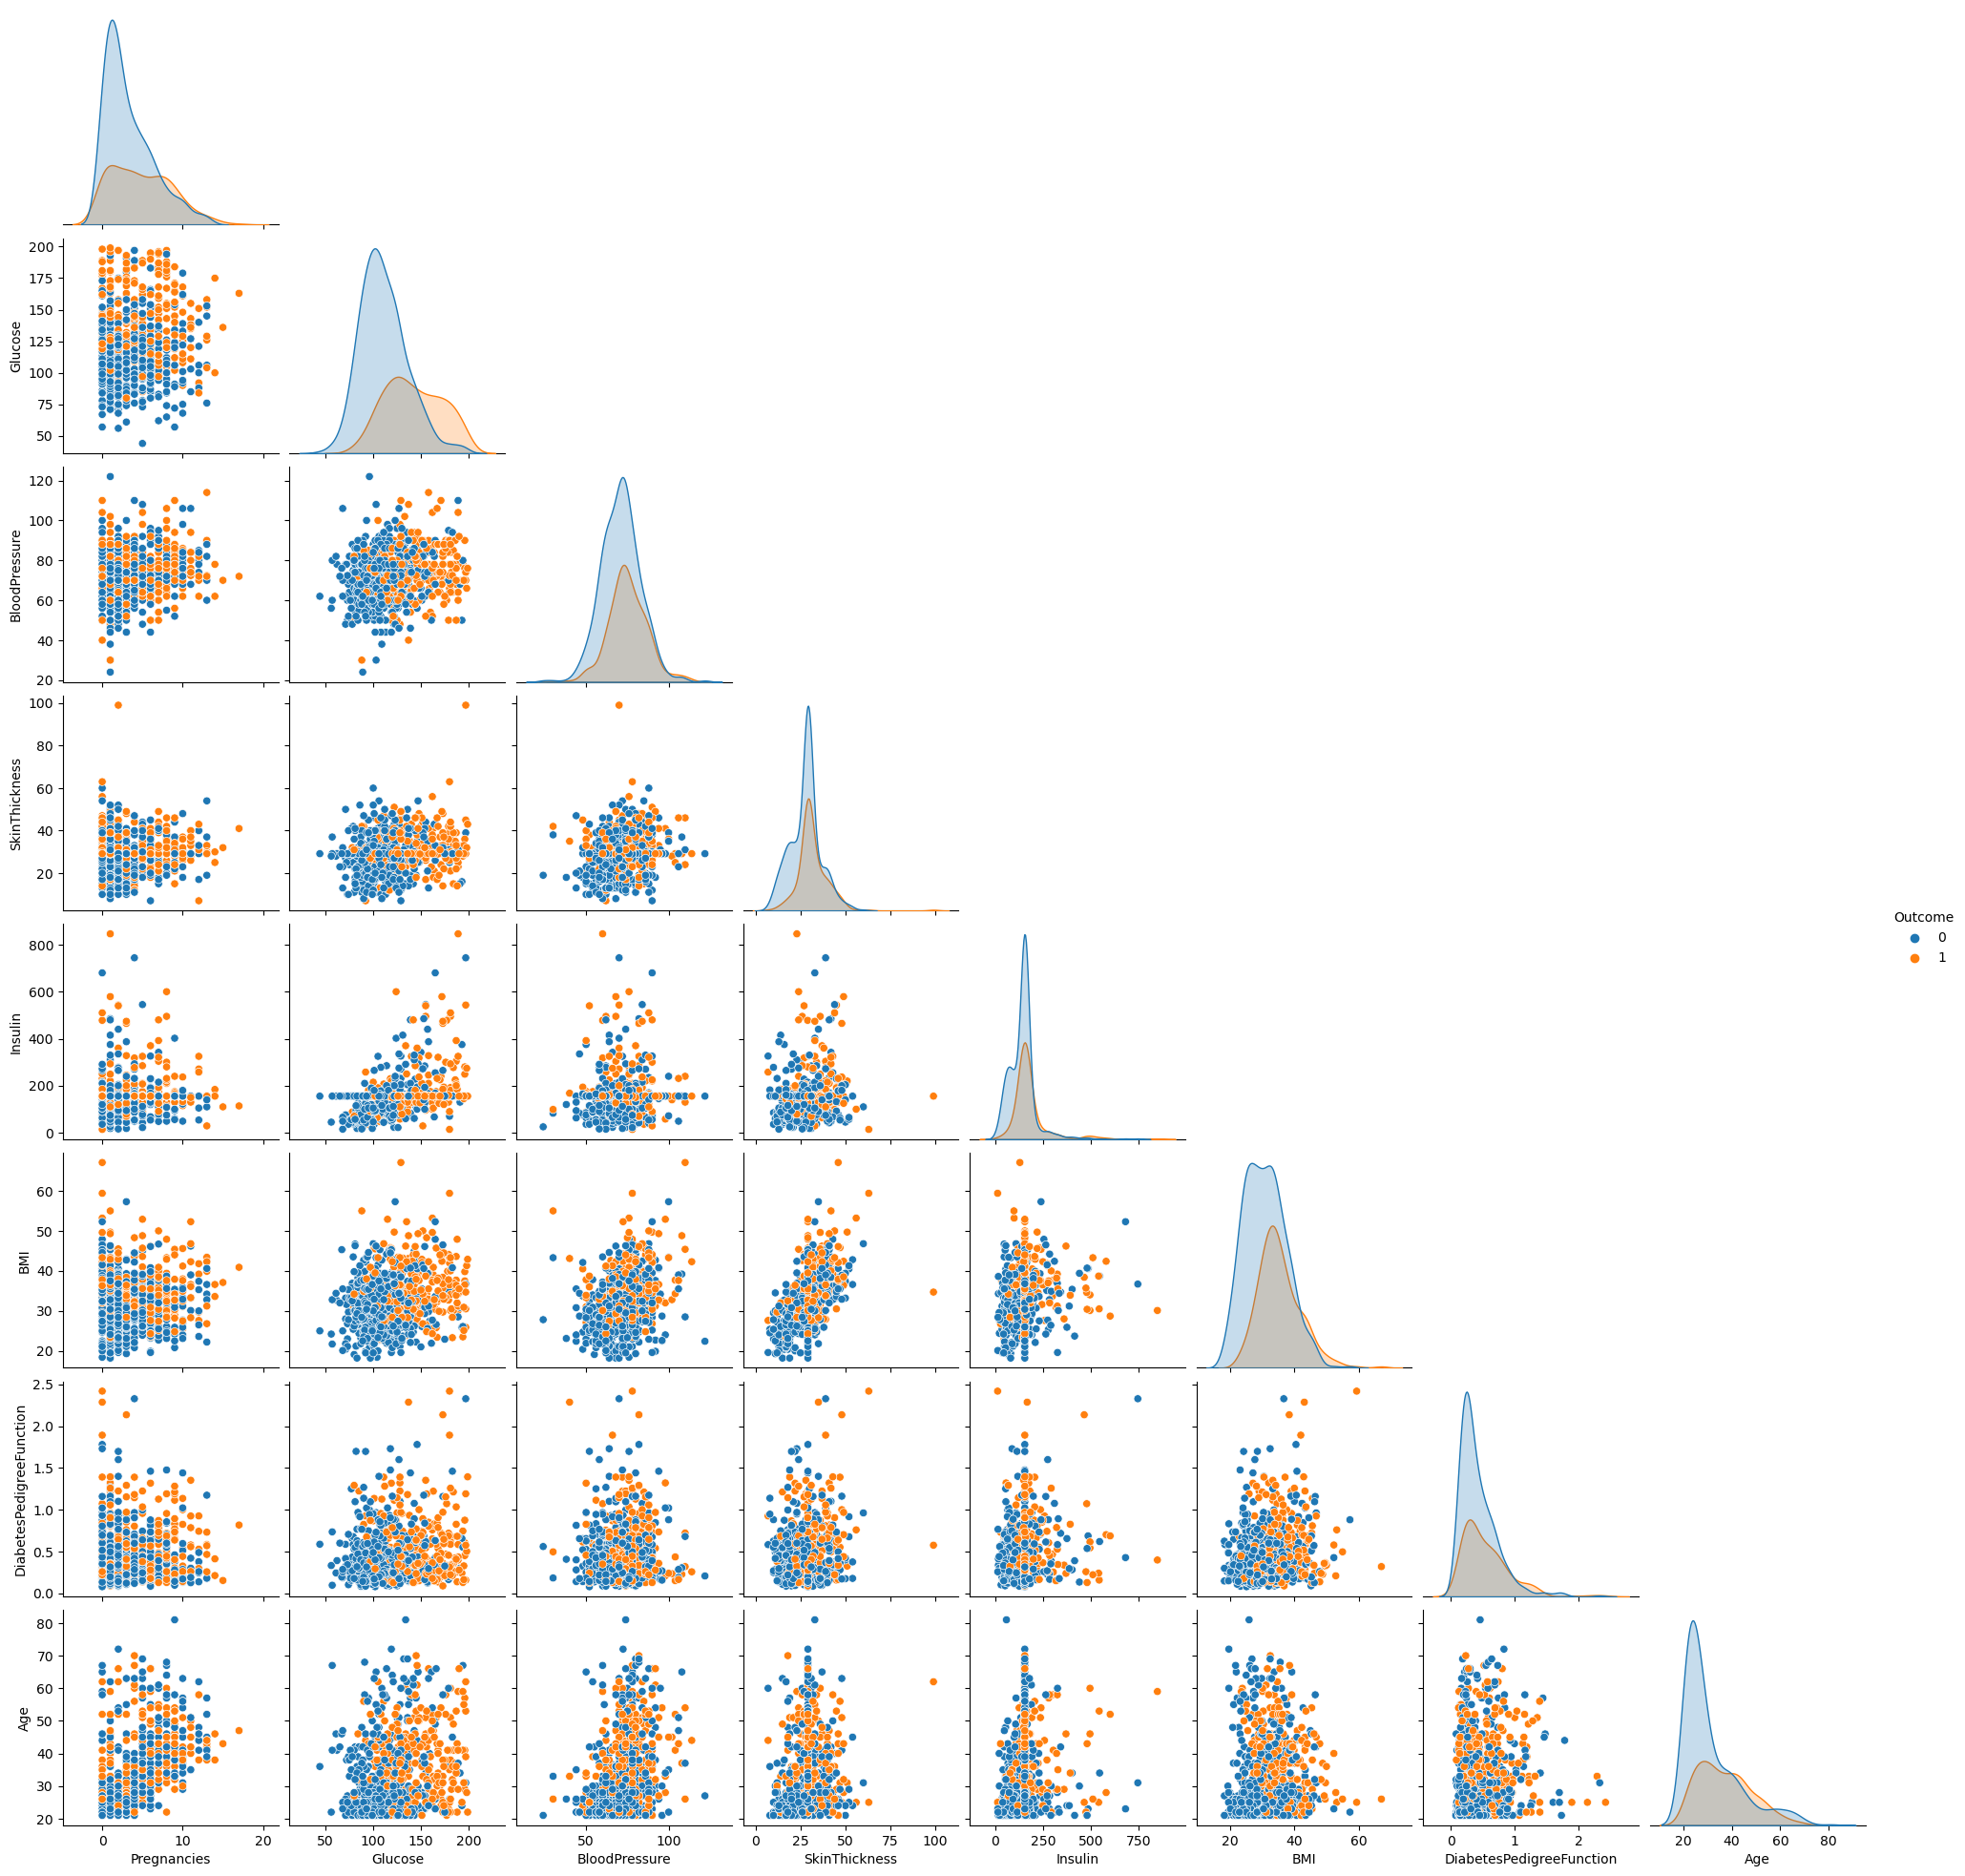

In [59]:
plt.figure(figsize=(30,30))
sns.pairplot(data=diabetes1, hue="Outcome", corner=True)

<AxesSubplot:>

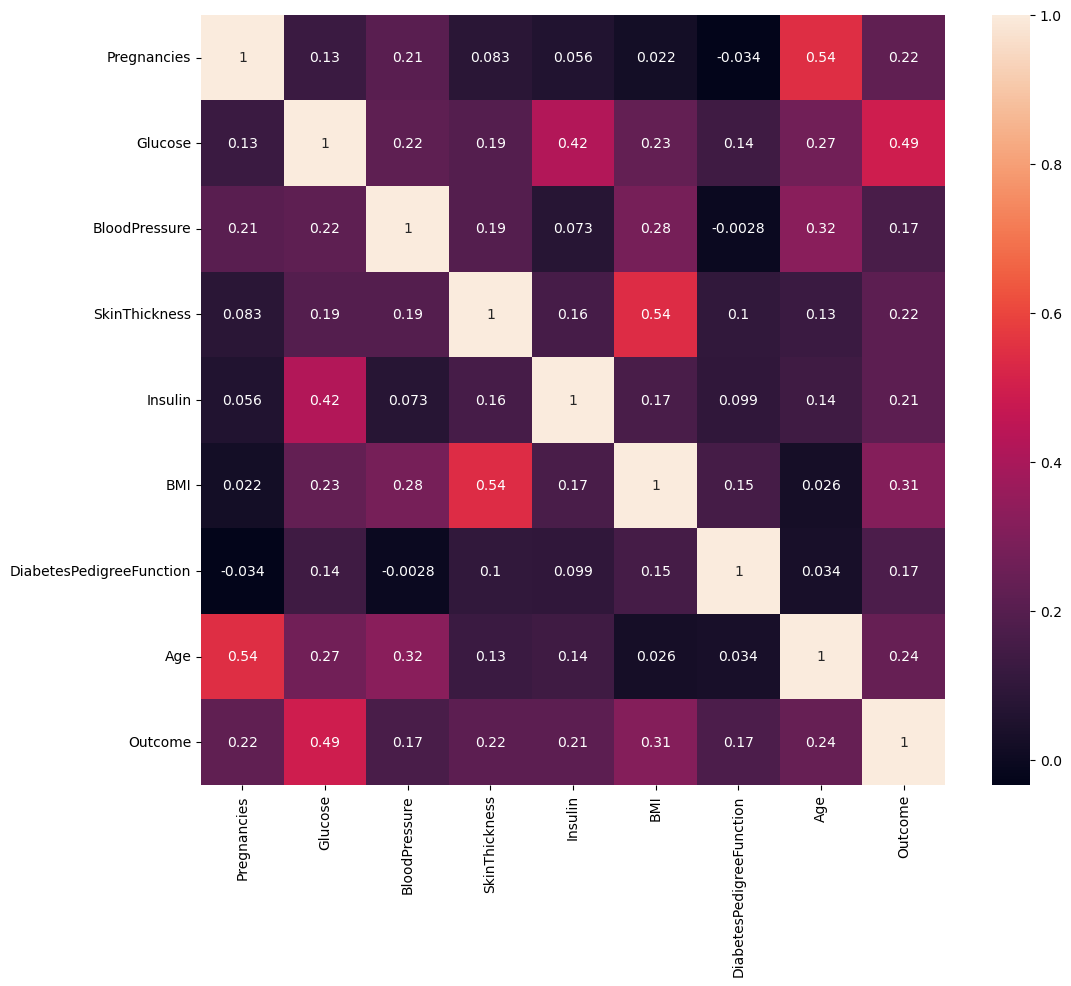

In [57]:
plt.figure(figsize=(12,10))
sns.heatmap(data=diabetes1.corr(), annot=True)


Высокая корреляция наблюдается между Pregnancies и Age, SkinThickness и BMI, Glucose и Outcome, Glucose и Insulin

# Разбиение выборки на тестовую и обучающую

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [84]:
X = diabetes1.iloc[:, :8]
y = diabetes1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3, stratify=y)

In [70]:
print(X_train.shape)
print(X_test.shape)

(514, 8)
(254, 8)


In [75]:
print(y_train.value_counts())

0    335
1    179
Name: Outcome, dtype: int64


In [76]:
print(y_test.value_counts())

0    165
1     89
Name: Outcome, dtype: int64


In [85]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)

In [86]:
X_test = Scaler.transform(X_test)

In [88]:
X_train

array([[ 6.31027628e-01, -5.03394683e-01,  1.24399981e+00, ...,
         6.38039638e-01,  8.04091099e-01, -2.33497398e-01],
       [ 2.39859276e+00, -3.90252944e-02,  4.46094426e-01, ...,
        -8.59195774e-01, -6.18711332e-01,  2.27868865e+00],
       [-1.13653750e+00,  2.21648316e+00,  2.52064842e+00, ...,
         2.74632984e-01, -8.36403321e-02,  5.76885198e-01],
       ...,
       [-5.47349123e-01, -1.29945649e+00, -5.91182572e-01, ...,
         6.38039638e-01,  5.06153838e-01, -8.00765215e-01],
       [ 1.80940438e+00, -2.38040747e-01, -3.18940208e-04, ...,
         6.79700021e-03, -6.12630980e-01, -3.14535657e-01],
       [ 3.36433440e-01, -8.68256345e-01,  1.26932273e-01, ...,
         1.72879122e-01,  1.62493866e+00,  7.38961717e-01]])

Разбили данные на обучающие и тестовые в соотношении 1:3 страфицированно. 

Проделали масштабирование данных